Import the necessary modules

In [1]:
import random
import statistics
import matplotlib.pyplot as plt


Make helper functions

In [2]:
def pickedCandy() -> bool:
    return random.randint(0, 1) == 1

def getProportionAccepted(l:list) -> float:
    return (sum(1.0 for element in l if element) / len(l))

def getProportionDiff(list1:list, list2:list) -> float:
    return getProportionAccepted(list2) - getProportionAccepted(list1)


Define classes for each person. Wrote a superclass for shared functionality. In this case, Gio, Gene, and Teddy. Each class has the total number of males/females interacted with across the two outfit treatments. Make the constructor initialize a list for each of these groups. For example, if I interacted with 20 males with a crusty fit, the list self.crustyboys should be a list of 20 randomly generated booleans, True if accepted candy, False if declined, with the size corresponding to the number of people interacted with. These classes also have functionality to compare the proportion differences between boys and girls. This method is only called when testing for significance in gender differences



In [3]:
class PERSON():
    def __init__(self, crusty_n_girls, crusty_n_boys, nice_n_girls, nice_n_boys) -> None:
        self.CRUSTY_N_GIRLS = crusty_n_girls
        self.CRUSTY_N_BOYS = crusty_n_boys
        self.NICE_N_GIRLS = nice_n_girls
        self.NICE_N_BOYS = nice_n_boys
        self.generate_random()

    def generate_random(self):
        self.crustygirls = [pickedCandy() for a in range(self.CRUSTY_N_GIRLS)]
        self.crustyboys = [pickedCandy() for a in range(self.CRUSTY_N_BOYS)]
        self.nicegirls = [pickedCandy() for a in range(self.NICE_N_GIRLS)]
        self.niceboys = [pickedCandy() for a in range(self.NICE_N_BOYS)]

    def simulate_gender_diff(self, trials:int) ->float:
        results = []
        for i in range(trials):
            self.generate_random()
            results.append(getProportionDiff(self.crustyboys, self.niceboys) - getProportionDiff(self.crustygirls, self.nicegirls))
        return results


    def simulate_clothing(self, trials:int):
        results = []
        for i in range(trials):
            self.generate_random()
            results.append(getProportionDiff(self.crustyboys + self.crustygirls, self.niceboys + self.nicegirls))
        return results

    def analyze_trials(self, y, trials:list):
        percent_greater_than_observed = (sum([1.0 for x in trials if x >= y]) / len(trials)) * 100
        if percent_greater_than_observed <= 5:
            print('Statistically significant. Only ' + str(percent_greater_than_observed) + '% of trials achieved a difference greater than ' + str(y))
        else:
            print('falls within natural error. ' + str(percent_greater_than_observed) + '% of trials achieved a difference greater than ' + str(y))
        
        plt.hist(trials, 100)
        plt.axvline(y, color='k', linestyle='dashed', linewidth=2).set_label(str(percent_greater_than_observed) + '% of trials achieved a difference greater than ' + str(y))
        plt.show()

class GIO(PERSON):
    CRUSTY_N_GIRLS = 10
    CRUSTY_N_BOYS = 10
    NICE_N_GIRLS = 10
    NICE_N_BOYS = 10

    def __init__(self) -> None:
        PERSON.__init__(self,
            GIO.CRUSTY_N_GIRLS,
            GIO.CRUSTY_N_BOYS,
            GIO.NICE_N_GIRLS,
            GIO.NICE_N_BOYS
        )

class GENE(PERSON):
    CRUSTY_N_GIRLS = 10
    CRUSTY_N_BOYS = 10
    NICE_N_GIRLS = 10
    NICE_N_BOYS = 10

    def __init__(self) -> None:
        PERSON.__init__(self,
            GENE.CRUSTY_N_GIRLS,
            GENE.CRUSTY_N_BOYS,
            GENE.NICE_N_GIRLS,
            GENE.NICE_N_BOYS
        )

class TEDDY(PERSON):
    CRUSTY_N_GIRLS = 10
    CRUSTY_N_BOYS = 10
    NICE_N_GIRLS = 10
    NICE_N_BOYS = 10

    def __init__(self) -> None:
        PERSON.__init__(self,
            TEDDY.CRUSTY_N_GIRLS,
            TEDDY.CRUSTY_N_BOYS,
            TEDDY.NICE_N_GIRLS,
            TEDDY.NICE_N_BOYS
        )



Now, I determined the number of trials I would like to do. In other words, the amount of times you want to repeat the component of the simulation

In [4]:
TRIALS = 10000

Now, we can test whether our findings for each person are of statistical significance. Lets start with gio. The acceptance rate while he was wearing crusty clothes was .53. The acceptance rate while he was wearing nice clothes was .93. That means the difference in proportions was .4

Statistically significant. Only 3.51% of trials achieved a difference greater than 0.3


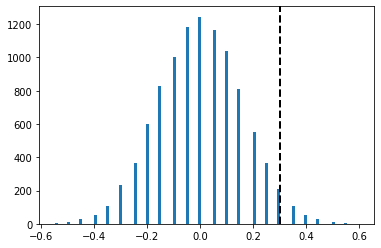

In [5]:
gio = GIO()

trials = gio.simulate_clothing(TRIALS)
gio.analyze_trials(.3, trials)


To determine statistical significane of gender, we do the same thing, but for each of us, we get the difference in the difference of proportions etween boys and girls. In this case, the difference in acceptance rate across girls was .62. The difference in acceptance rate across boys was .13. Therefore, there was a bigger margin for girls by .19

falls within natural error. 31.61% of trials achieved a difference greater than 0.19


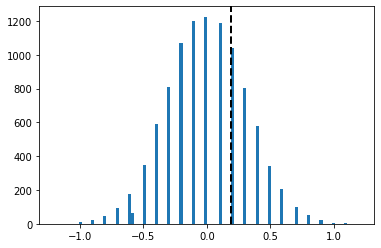

In [6]:
trials = gio.simulate_gender_diff(TRIALS)
gio.analyze_trials(.19, trials)